In [12]:
%load_ext autoreload
%autoreload 2
%cd /home/ftei-dsw/projects/weather-gan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/ftei-dsw/projects/weather-gan


In [19]:
from src.data import DataModule
import matplotlib.pyplot as plt

In [15]:
dm = DataModule(train_batch_size=4,
                test_batch_size=64)
dm.setup('fit')

In [16]:
train_loader = dm.train_dataloader()

In [17]:
batch = next(iter(train_loader))

In [18]:
batch[0]['input'].shape, batch[0]['target'].shape

(torch.Size([4, 68, 94, 2]), torch.Size([4, 68, 94, 2]))

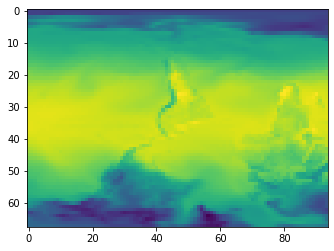

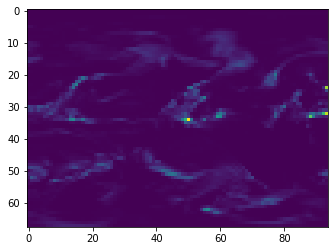

In [23]:
plt.imshow(batch[0]['target'][0,:,:,0].cpu())
plt.show()
plt.imshow(batch[0]['target'][0,:,:,1].cpu())

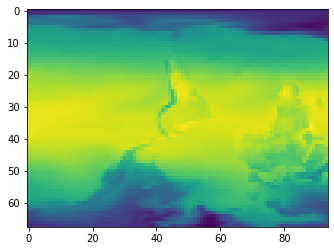

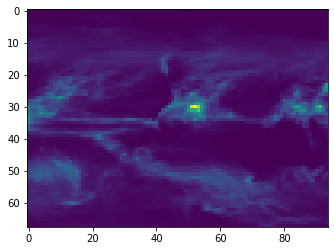

In [24]:
plt.imshow(batch[0]['input'][0,:,:,0].cpu())
plt.show()
plt.imshow(batch[0]['input'][0,:,:,1].cpu())

In [20]:
import xarray as xr
ds.close()
ds = xr.open_dataset('/home/ftei-dsw/data/weather-gan/datasets/daily_gfdl_historical.nc')

In [23]:
ds.sel(time=f'2000-01-07')

<xarray.Dataset>
Dimensions:        (time: 1, longitude: 144, latitude: 73)
Coordinates:
  * time           (time) object 2000-01-07 12:00:00
  * longitude      (longitude) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * latitude       (latitude) float64 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
Data variables:
    precipitation  (time, latitude, longitude) float32 ...
    temperature    (time, latitude, longitude) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    Conventions:    CF-1.6
    regrid_method:  bilinear
    history:        Tue Apr 05 18:11:38 2022: cdo merge precipitation_daily_g...
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...